In [2]:
from sklearn.model_selection import cross_val_score

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
#from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
import pickle as pickle
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
TARGET_COLS=['toxic','severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate','clean']
#enumerate(TARGET_COLS)=[0:'toxic',1:'severe_toxic', 2:'obscene',3: 'threat',4: 'insult', 'identity_hate']


from sklearn.model_selection import train_test_split

## NEURAL NETWORK ARCHITECTURE

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import pandas as pd
batch_size = 128
num_classes = 10
epochs = 20

#I have 1 single layer perceptron defined inside loops of every feature ....see below.. dont worry codes .. basically this will inside 
#MLP classifier
# model = Sequential()
#     model.add(Dense(512, activation='relu', input_shape=(long(X_train.shape[1]),)))
#     model.add(Dropout(0.2))
#     model.add(Dense(2, activation='softmax'))

#     model.summary()


/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## UNIGRAMS

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               133632    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1026      
Total params: 134,658
Trainable params: 134,658
Non-trainable params: 0
_________________________________________________________________
             precision    recall  f1-score   support

          0       0.69      0.46      0.55       785
          1       0.87      0.95      0.91      3060

avg / total       0.83      0.85      0.84      3845



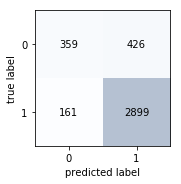

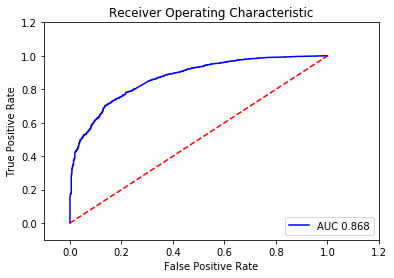

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               133632    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 1026      
Total params: 134,658
Trainable params: 134,658
Non-trainable params: 0
_________________________________________________________________
             precision    recall  f1-score   support

          0       0.93      0.98      0.95      3520
          1       0.45      0.15      0.22       325

avg / total       0.89      0.91      0.89      3845



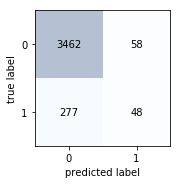

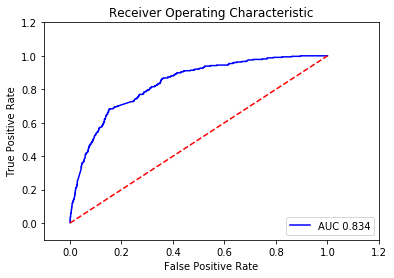

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               133632    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 1026      
Total params: 134,658
Trainable params: 134,658
Non-trainable params: 0
_________________________________________________________________
             precision    recall  f1-score   support

          0       0.81      0.90      0.85      2126
          1       0.85      0.74      0.79      1719

avg / total       0.83      0.82      0.82      3845



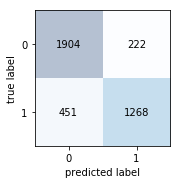

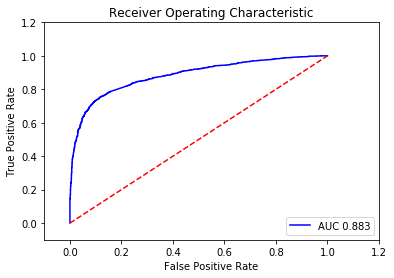

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               133632    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 1026      
Total params: 134,658
Trainable params: 134,658
Non-trainable params: 0
_________________________________________________________________
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      3753
          1       0.44      0.17      0.25        92

avg / total       0.97      0.98      0.97      3845



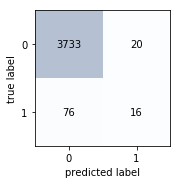

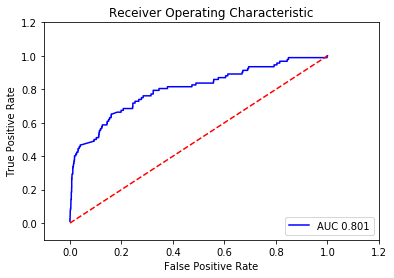

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               133632    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 1026      
Total params: 134,658
Trainable params: 134,658
Non-trainable params: 0
_________________________________________________________________
             precision    recall  f1-score   support

          0       0.77      0.82      0.79      2222
          1       0.73      0.66      0.70      1623

avg / total       0.75      0.75      0.75      3845



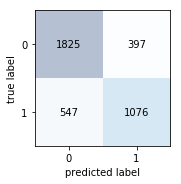

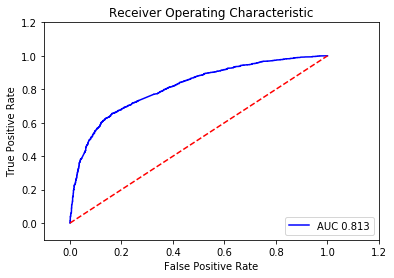

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               133632    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 1026      
Total params: 134,658
Trainable params: 134,658
Non-trainable params: 0
_________________________________________________________________
             precision    recall  f1-score   support

          0       0.94      0.99      0.96      3568
          1       0.62      0.12      0.20       277

avg / total       0.91      0.93      0.91      3845



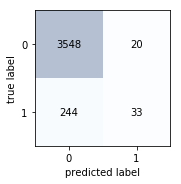

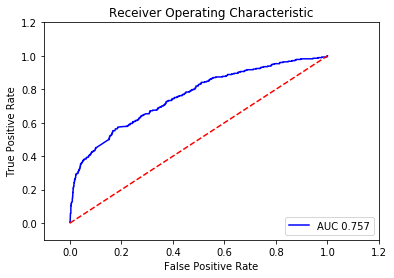

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               133632    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 1026      
Total params: 134,658
Trainable params: 134,658
Non-trainable params: 0
_________________________________________________________________
             precision    recall  f1-score   support

      False       0.93      0.95      0.94      3259
       True       0.66      0.58      0.62       586

avg / total       0.89      0.89      0.89      3845



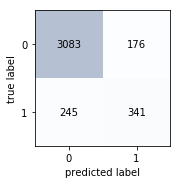

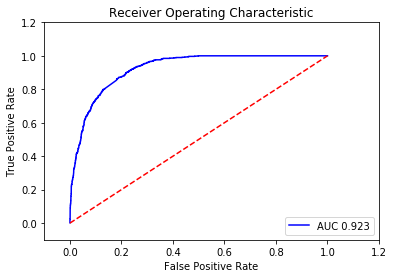

In [5]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, classification_report,confusion_matrix
from sklearn.utils import class_weight
import numpy as np
import matplotlib.pyplot as plt

for i, j in enumerate(TARGET_COLS):
    target_x=pickle.load(open("../pickle/target_x1_mlnew.pkl", "rb" ))
    target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    temp=y_valid[j]
    cw = class_weight.compute_class_weight('balanced', np.unique(y_train[j]), y_train[j])
    y_train = keras.utils.to_categorical(y_train[j], 2)
    #print()
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(int(X_train.shape[1]),)))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    history = model.fit(X_train.values,y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=0,
                    validation_data=(X_valid.values, keras.utils.to_categorical(y_valid[j], 2)),class_weight=cw)
    #score = model.evaluate(x_test, y_test, verbose=0)
    bb = model.predict(X_valid.values)[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cc = model.predict_classes(X_valid.values)
    #print(cc,y_valid[j])
    cfm=(classification_report(temp,cc))
    print(cfm)
    cfm=confusion_matrix(temp,cc)
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()

    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

## BIGRAMS

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               43008     
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 1026      
Total params: 44,034
Trainable params: 44,034
Non-trainable params: 0
_________________________________________________________________
             precision    recall  f1-score   support

          0       0.44      0.04      0.07       785
          1       0.80      0.99      0.88      3060

avg / total       0.73      0.79      0.72      3845



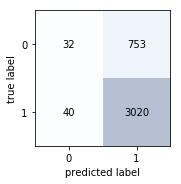

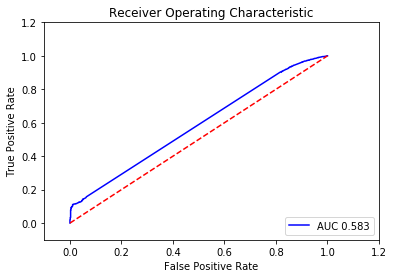

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               43008     
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 1026      
Total params: 44,034
Trainable params: 44,034
Non-trainable params: 0
_________________________________________________________________
             precision    recall  f1-score   support

          0       0.92      1.00      0.96      3520
          1       0.61      0.07      0.13       325

avg / total       0.89      0.92      0.89      3845



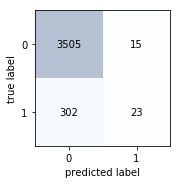

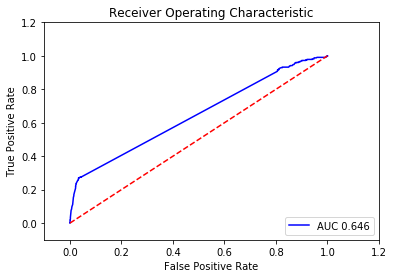

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               43008     
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 1026      
Total params: 44,034
Trainable params: 44,034
Non-trainable params: 0
_________________________________________________________________
             precision    recall  f1-score   support

          0       0.59      0.98      0.74      2126
          1       0.86      0.17      0.29      1719

avg / total       0.71      0.62      0.54      3845



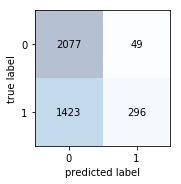

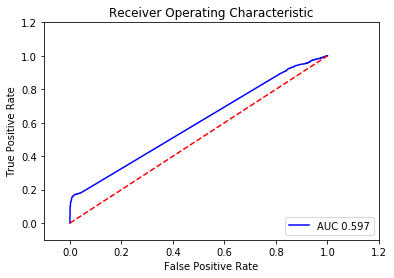

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               43008     
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 1026      
Total params: 44,034
Trainable params: 44,034
Non-trainable params: 0
_________________________________________________________________
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      3753
          1       0.00      0.00      0.00        92

avg / total       0.95      0.98      0.96      3845



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


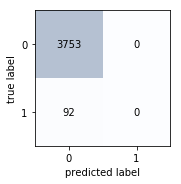

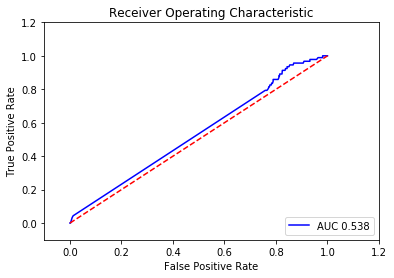

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 512)               43008     
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 1026      
Total params: 44,034
Trainable params: 44,034
Non-trainable params: 0
_________________________________________________________________
             precision    recall  f1-score   support

          0       0.61      0.97      0.75      2222
          1       0.78      0.14      0.24      1623

avg / total       0.68      0.62      0.53      3845



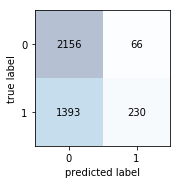

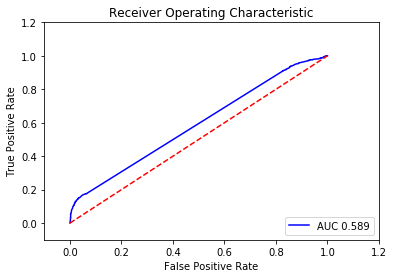

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               43008     
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 1026      
Total params: 44,034
Trainable params: 44,034
Non-trainable params: 0
_________________________________________________________________
             precision    recall  f1-score   support

          0       0.93      1.00      0.96      3568
          1       0.62      0.02      0.04       277

avg / total       0.91      0.93      0.90      3845



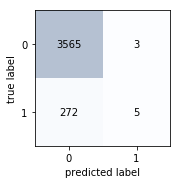

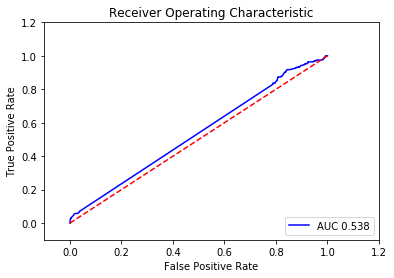

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 512)               43008     
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 2)                 1026      
Total params: 44,034
Trainable params: 44,034
Non-trainable params: 0
_________________________________________________________________
             precision    recall  f1-score   support

      False       0.85      0.98      0.91      3259
       True       0.39      0.06      0.11       586

avg / total       0.78      0.84      0.79      3845



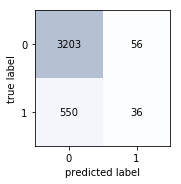

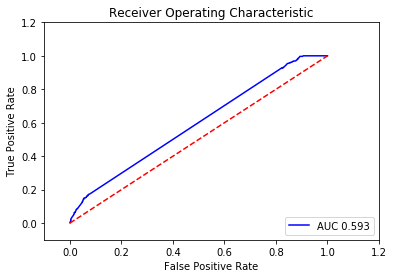

In [6]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, classification_report,confusion_matrix
from sklearn.utils import class_weight
import numpy as np
import matplotlib.pyplot as plt

for i, j in enumerate(TARGET_COLS):
    target_x=pickle.load(open("../pickle/target_x2_mlnew.pkl", "rb" ))
    target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    temp=y_valid[j]
    cw = class_weight.compute_class_weight('balanced', np.unique(y_train[j]), y_train[j])
    y_train = keras.utils.to_categorical(y_train[j], 2)
    #print()
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(int(X_train.shape[1]),)))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    history = model.fit(X_train.values,y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=0,
                    validation_data=(X_valid.values, keras.utils.to_categorical(y_valid[j], 2)),class_weight=cw)
    #score = model.evaluate(x_test, y_test, verbose=0)
    bb = model.predict(X_valid.values)[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cc = model.predict_classes(X_valid.values)
    #print(cc,y_valid[j])
    cfm=(classification_report(temp,cc))
    print(cfm)
    cfm=confusion_matrix(temp,cc)
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()

    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

## CHARNGRAM

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 512)               2979328   
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 2)                 1026      
Total params: 2,980,354
Trainable params: 2,980,354
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 4s 356us/step - loss: 0.3638 - acc: 0.8428 - val_loss: 0.3087 - val_acc: 0.8744
Epoch 2/10
12304/12304 [==============================] - 4s 302us/step - loss: 0.2479 - acc: 0.9043 - val_loss: 0.3128 - val_acc: 0.8702
Epoch 3/10
12304/12304 [==============================] - 4s 309us/step

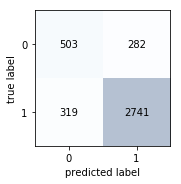

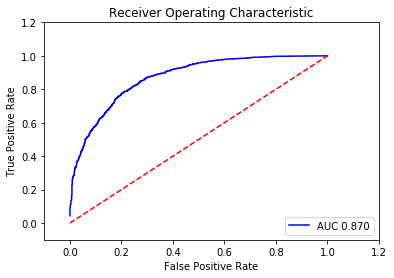

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 512)               2979328   
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 2)                 1026      
Total params: 2,980,354
Trainable params: 2,980,354
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 5s 373us/step - loss: 0.2540 - acc: 0.9130 - val_loss: 0.2357 - val_acc: 0.9142
Epoch 2/10
12304/12304 [==============================] - 4s 337us/step - loss: 0.1994 - acc: 0.9241 - val_loss: 0.2300 - val_acc: 0.9144
Epoch 3/10
12304/12304 [==============================] - 4s 317us/step

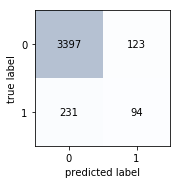

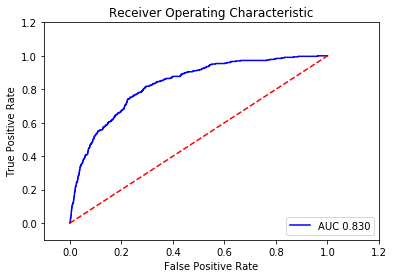

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 512)               2979328   
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 2)                 1026      
Total params: 2,980,354
Trainable params: 2,980,354
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 5s 392us/step - loss: 0.4609 - acc: 0.7934 - val_loss: 0.4034 - val_acc: 0.8276
Epoch 2/10
12304/12304 [==============================] - 4s 296us/step - loss: 0.3128 - acc: 0.8711 - val_loss: 0.3825 - val_acc: 0.8408
Epoch 3/10
12304/12304 [==============================] - 4s 285us/step

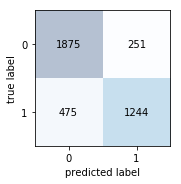

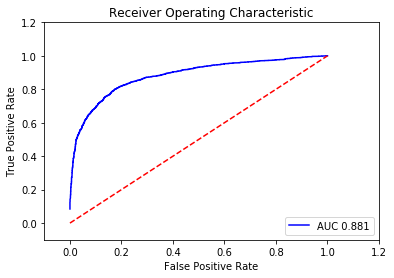

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 512)               2979328   
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 2)                 1026      
Total params: 2,980,354
Trainable params: 2,980,354
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 4s 358us/step - loss: 0.1384 - acc: 0.9708 - val_loss: 0.1117 - val_acc: 0.9761
Epoch 2/10
12304/12304 [==============================] - 4s 290us/step - loss: 0.0921 - acc: 0.9757 - val_loss: 0.1058 - val_acc: 0.9771
Epoch 3/10
12304/12304 [==============================] - 4s 287us/step

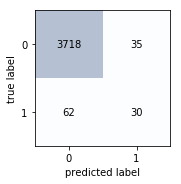

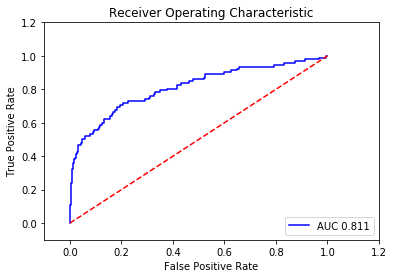

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 512)               2979328   
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 2)                 1026      
Total params: 2,980,354
Trainable params: 2,980,354
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 4s 336us/step - loss: 0.5260 - acc: 0.7419 - val_loss: 0.4829 - val_acc: 0.7709
Epoch 2/10
12304/12304 [==============================] - 4s 286us/step - loss: 0.4134 - acc: 0.8103 - val_loss: 0.4975 - val_acc: 0.7698
Epoch 3/10
12304/12304 [==============================] - 4s 286us/step

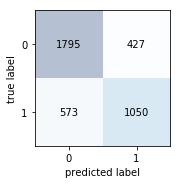

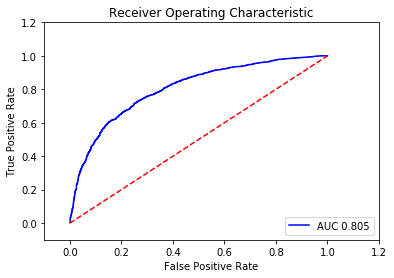

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 512)               2979328   
_________________________________________________________________
dropout_20 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 2)                 1026      
Total params: 2,980,354
Trainable params: 2,980,354
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 4s 335us/step - loss: 0.2597 - acc: 0.9223 - val_loss: 0.2223 - val_acc: 0.9303
Epoch 2/10
12304/12304 [==============================] - 4s 286us/step - loss: 0.1870 - acc: 0.9346 - val_loss: 0.2084 - val_acc: 0.9339s - loss: 0.1889 - acc: 0.
Epoch 3/10
12304/12304 [=====================

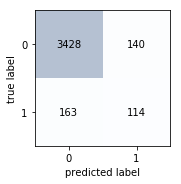

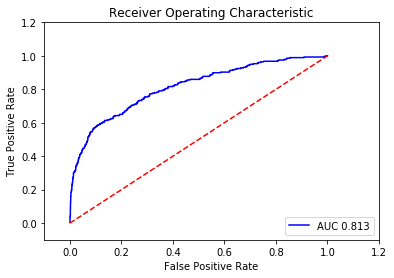

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 512)               2979328   
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 2)                 1026      
Total params: 2,980,354
Trainable params: 2,980,354
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 4s 336us/step - loss: 0.2771 - acc: 0.8846 - val_loss: 0.2044 - val_acc: 0.9202
Epoch 2/10
12304/12304 [==============================] - 3s 284us/step - loss: 0.1452 - acc: 0.9439 - val_loss: 0.1942 - val_acc: 0.9248
Epoch 3/10
12304/12304 [==============================] - 3s 284us/step

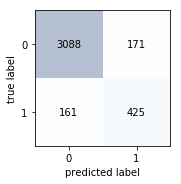

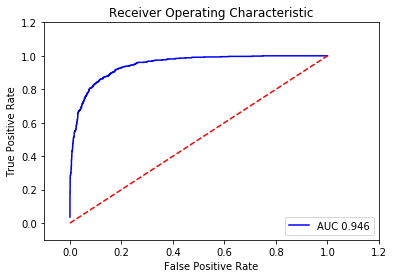

In [7]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, classification_report,confusion_matrix
from sklearn.utils import class_weight
import numpy as np
import matplotlib.pyplot as plt

for i, j in enumerate(TARGET_COLS):
    target_x=pickle.load(open("../pickle/target_x3_mlnew.pkl", "rb" ))
    target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    temp=y_valid[j]
    cw = class_weight.compute_class_weight('balanced', np.unique(y_train[j]), y_train[j])
    y_train = keras.utils.to_categorical(y_train[j], 2)
    #print()
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(int(X_train.shape[1]),)))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    history = model.fit(X_train.values,y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_valid.values, keras.utils.to_categorical(y_valid[j], 2)),class_weight=cw)
    #score = model.evaluate(x_test, y_test, verbose=0)
    bb = model.predict(X_valid.values)[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cc = model.predict_classes(X_valid.values)
    #print(cc,y_valid[j])
    cfm=(classification_report(temp,cc))
    print(cfm)
    cfm=confusion_matrix(temp,cc)
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()

    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

## SELECTED FEATURES

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 512)               4608      
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 2)                 1026      
Total params: 5,634
Trainable params: 5,634
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 1s 66us/step - loss: 2.5526 - acc: 0.7219 - val_loss: 1.8368 - val_acc: 0.7958
Epoch 2/10
12304/12304 [==============================] - 0s 17us/step - loss: 2.3263 - acc: 0.7269 - val_loss: 2.6137 - val_acc: 0.7958
Epoch 3/10
12304/12304 [==============================] - 0s 17us/step - loss: 2.

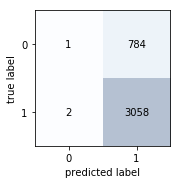

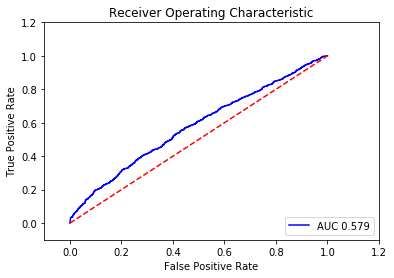

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 512)               4608      
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 2)                 1026      
Total params: 5,634
Trainable params: 5,634
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 1s 68us/step - loss: 0.9061 - acc: 0.8878 - val_loss: 0.6789 - val_acc: 0.9163
Epoch 2/10
12304/12304 [==============================] - 0s 17us/step - loss: 0.7678 - acc: 0.8874 - val_loss: 0.9702 - val_acc: 0.9155
Epoch 3/10
12304/12304 [==============================] - 0s 17us/step - loss: 0.

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


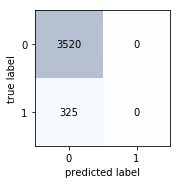

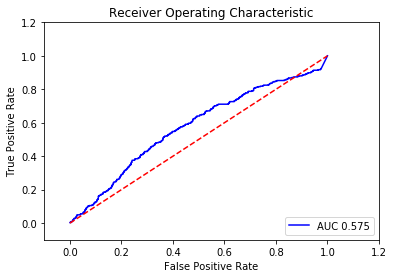

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 512)               4608      
_________________________________________________________________
dropout_24 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 2)                 1026      
Total params: 5,634
Trainable params: 5,634
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 1s 69us/step - loss: 3.1758 - acc: 0.5436 - val_loss: 2.3661 - val_acc: 0.4531
Epoch 2/10
12304/12304 [==============================] - 0s 17us/step - loss: 2.6971 - acc: 0.5546 - val_loss: 2.9275 - val_acc: 0.5691
Epoch 3/10
12304/12304 [==============================] - -3s -236us/step - loss:

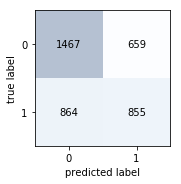

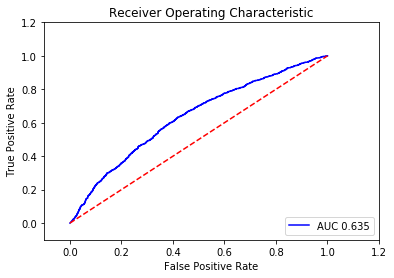

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 512)               4608      
_________________________________________________________________
dropout_25 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 2)                 1026      
Total params: 5,634
Trainable params: 5,634
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 1s 72us/step - loss: 0.3294 - acc: 0.9690 - val_loss: 0.3603 - val_acc: 0.9761
Epoch 2/10
12304/12304 [==============================] - 0s 17us/step - loss: 0.3216 - acc: 0.9700 - val_loss: 0.3050 - val_acc: 0.9761
Epoch 3/10
12304/12304 [==============================] - 0s 17us/step - loss: 0.

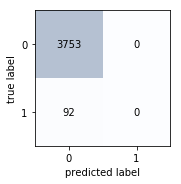

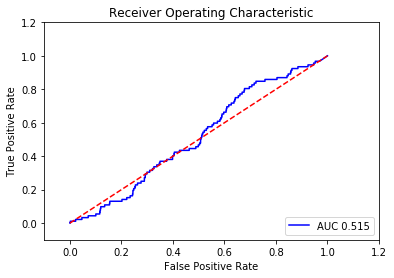

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 512)               4608      
_________________________________________________________________
dropout_26 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 2)                 1026      
Total params: 5,634
Trainable params: 5,634
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 1s 74us/step - loss: 3.0489 - acc: 0.5432 - val_loss: 2.5660 - val_acc: 0.4198
Epoch 2/10
12304/12304 [==============================] - 0s 17us/step - loss: 2.5091 - acc: 0.5488 - val_loss: 2.2825 - val_acc: 0.5834
Epoch 3/10
12304/12304 [==============================] - 0s 17us/step - loss: 2.

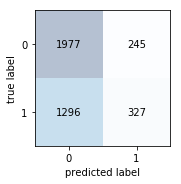

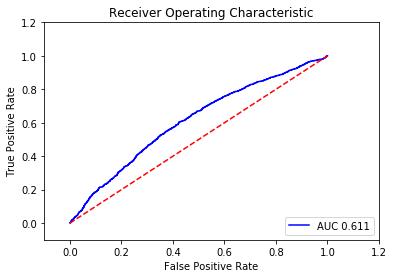

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 512)               4608      
_________________________________________________________________
dropout_27 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 2)                 1026      
Total params: 5,634
Trainable params: 5,634
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 1s 76us/step - loss: 0.9483 - acc: 0.9029 - val_loss: 0.7971 - val_acc: 0.9280
Epoch 2/10
12304/12304 [==============================] - 0s 17us/step - loss: 0.8542 - acc: 0.8991 - val_loss: 1.4104 - val_acc: 0.2372
Epoch 3/10
12304/12304 [==============================] - 0s 18us/step - loss: 0.

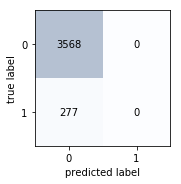

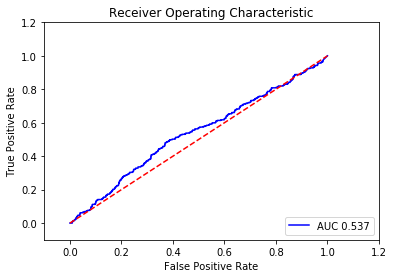

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 512)               4608      
_________________________________________________________________
dropout_28 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 2)                 1026      
Total params: 5,634
Trainable params: 5,634
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 1s 76us/step - loss: 1.9591 - acc: 0.7967 - val_loss: 7.6375 - val_acc: 0.1563
Epoch 2/10
12304/12304 [==============================] - 0s 17us/step - loss: 1.8874 - acc: 0.7876 - val_loss: 2.0188 - val_acc: 0.8476
Epoch 3/10
12304/12304 [==============================] - 0s 17us/step - loss: 1.

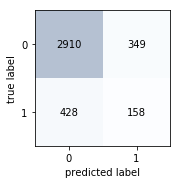

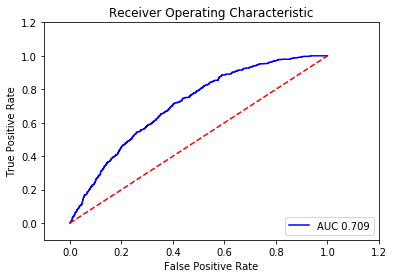

In [8]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, classification_report,confusion_matrix
from sklearn.utils import class_weight
import numpy as np
import matplotlib.pyplot as plt

for i, j in enumerate(TARGET_COLS):
    target_x=pickle.load(open("../pickle/target_x4_mlnew.pkl", "rb" ))
    target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    temp=y_valid[j]
    cw = class_weight.compute_class_weight('balanced', np.unique(y_train[j]), y_train[j])
    y_train = keras.utils.to_categorical(y_train[j], 2)
    #print()
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(int(X_train.shape[1]),)))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    history = model.fit(X_train.values,y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_valid.values, keras.utils.to_categorical(y_valid[j], 2)),class_weight=cw)
    #score = model.evaluate(x_test, y_test, verbose=0)
    bb = model.predict(X_valid.values)[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cc = model.predict_classes(X_valid.values)
    #print(cc,y_valid[j])
    cfm=(classification_report(temp,cc))
    print(cfm)
    cfm=confusion_matrix(temp,cc)
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()

    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

## WORDVECTORS - GLOVE

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 512)               2048      
_________________________________________________________________
dropout_29 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 2)                 1026      
Total params: 3,074
Trainable params: 3,074
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 1s 79us/step - loss: 0.6622 - acc: 0.7910 - val_loss: 0.6365 - val_acc: 0.7958
Epoch 2/10
12304/12304 [==============================] - 0s 17us/step - loss: 0.6156 - acc: 0.7962 - val_loss: 0.5960 - val_acc: 0.7958
Epoch 3/10
12304/12304 [==============================] - 0s 17us/step - loss: 0.

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


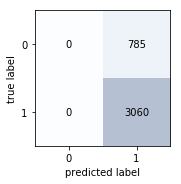

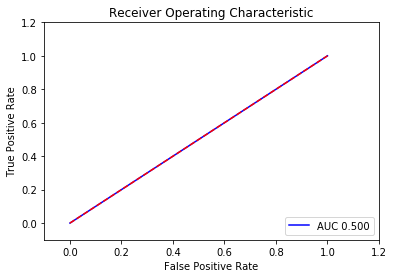

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 512)               2048      
_________________________________________________________________
dropout_30 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 2)                 1026      
Total params: 3,074
Trainable params: 3,074
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 1s 81us/step - loss: 0.6492 - acc: 0.9189 - val_loss: 0.6117 - val_acc: 0.9155
Epoch 2/10
12304/12304 [==============================] - 0s 17us/step - loss: 0.5778 - acc: 0.9189 - val_loss: 0.5466 - val_acc: 0.9155
Epoch 3/10
12304/12304 [==============================] - 0s 17us/step - loss: 0.

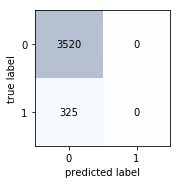

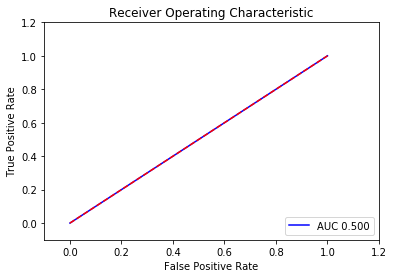

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 512)               2048      
_________________________________________________________________
dropout_31 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 2)                 1026      
Total params: 3,074
Trainable params: 3,074
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 1s 82us/step - loss: 0.6889 - acc: 0.5630 - val_loss: 0.6881 - val_acc: 0.5529
Epoch 2/10
12304/12304 [==============================] - 0s 17us/step - loss: 0.6858 - acc: 0.5630 - val_loss: 0.6875 - val_acc: 0.5529
Epoch 3/10
12304/12304 [==============================] - 0s 17us/step - loss: 0.

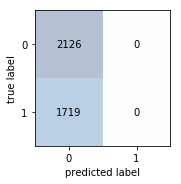

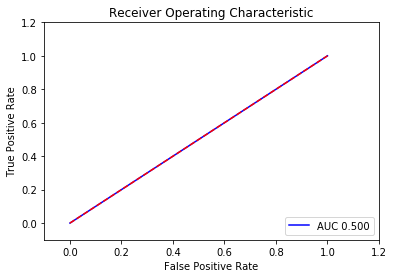

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 512)               2048      
_________________________________________________________________
dropout_32 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 2)                 1026      
Total params: 3,074
Trainable params: 3,074
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 1s 85us/step - loss: 0.6418 - acc: 0.9752 - val_loss: 0.5982 - val_acc: 0.9761
Epoch 2/10
12304/12304 [==============================] - 0s 17us/step - loss: 0.5601 - acc: 0.9752 - val_loss: 0.5217 - val_acc: 0.9761
Epoch 3/10
12304/12304 [==============================] - 0s 17us/step - loss: 0.

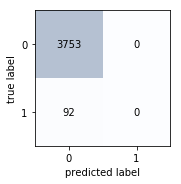

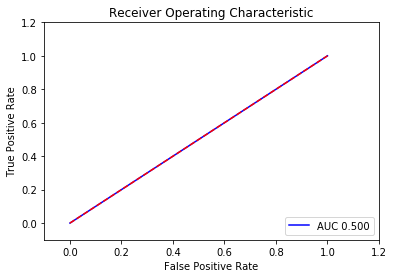

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 512)               2048      
_________________________________________________________________
dropout_33 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 2)                 1026      
Total params: 3,074
Trainable params: 3,074
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 1s 85us/step - loss: 0.6858 - acc: 0.5940 - val_loss: 0.6833 - val_acc: 0.5779
Epoch 2/10
12304/12304 [==============================] - 0s 17us/step - loss: 0.6782 - acc: 0.5940 - val_loss: 0.6811 - val_acc: 0.5779
Epoch 3/10
12304/12304 [==============================] - 0s 17us/step - loss: 0.

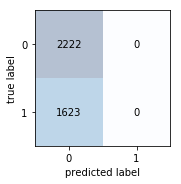

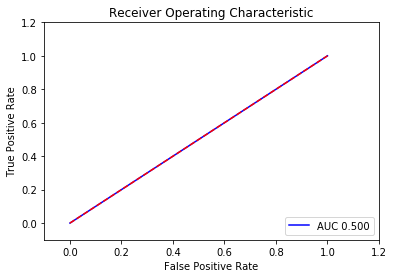

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 512)               2048      
_________________________________________________________________
dropout_34 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 2)                 1026      
Total params: 3,074
Trainable params: 3,074
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 1s 89us/step - loss: 0.6481 - acc: 0.9257 - val_loss: 0.6088 - val_acc: 0.9280
Epoch 2/10
12304/12304 [==============================] - 0s 17us/step - loss: 0.5759 - acc: 0.9257 - val_loss: 0.5417 - val_acc: 0.9280
Epoch 3/10
12304/12304 [==============================] - 0s 17us/step - loss: 0.

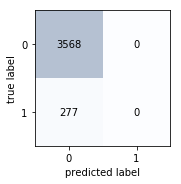

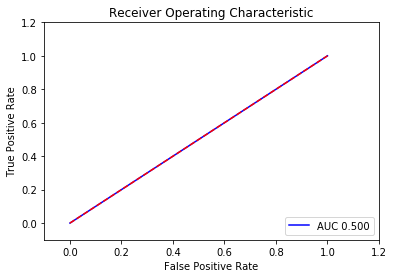

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 512)               2048      
_________________________________________________________________
dropout_35 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 2)                 1026      
Total params: 3,074
Trainable params: 3,074
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 1s 90us/step - loss: 0.6568 - acc: 0.8445 - val_loss: 0.6258 - val_acc: 0.8476
Epoch 2/10
12304/12304 [==============================] - 0s 18us/step - loss: 0.6009 - acc: 0.8445 - val_loss: 0.5740 - val_acc: 0.8476
Epoch 3/10
12304/12304 [==============================] - 0s 18us/step - loss: 0.

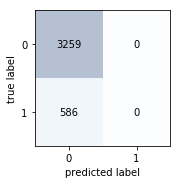

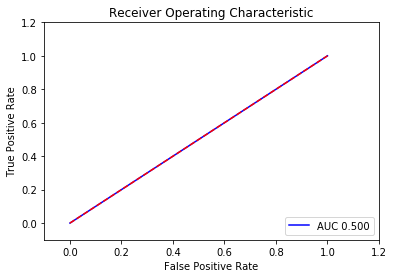

In [9]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, classification_report,confusion_matrix
from sklearn.utils import class_weight
import numpy as np
import matplotlib.pyplot as plt

for i, j in enumerate(TARGET_COLS):
    target_x=pickle.load(open("../pickle/target_x5_mlnew.pkl", "rb" ))
    target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)
    
    
    temp=y_valid[j]
    cw = class_weight.compute_class_weight('balanced', np.unique(y_train[j]), y_train[j])
    y_train = keras.utils.to_categorical(y_train[j], 2)
    #print()
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(int(X_train.shape[1]),)))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    history = model.fit(X_train,y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_valid, keras.utils.to_categorical(y_valid[j], 2)),class_weight=cw)
    #score = model.evaluate(x_test, y_test, verbose=0)
    bb = model.predict(X_valid)[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cc = model.predict_classes(X_valid)
    #print(cc,y_valid[j])
    cfm=(classification_report(temp,cc))
    print(cfm)
    cfm=confusion_matrix(temp,cc)
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()

    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

## hstack((train_bigrams,train_charngrams,train_unigrams,train_feats[SELECTED_COLS])).tocsr()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 512)               3159040   
_________________________________________________________________
dropout_36 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 2)                 1026      
Total params: 3,160,066
Trainable params: 3,160,066
Non-trainable params: 0
_________________________________________________________________
             precision    recall  f1-score   support

          0       0.91      0.23      0.37       785
          1       0.83      0.99      0.91      3060

avg / total       0.85      0.84      0.80      3845



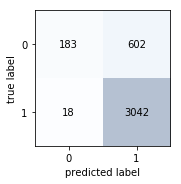

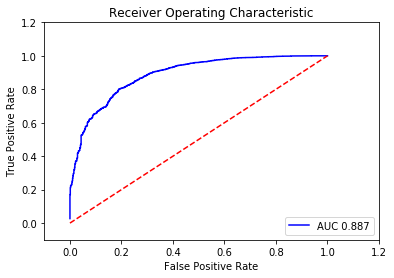

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 512)               3159040   
_________________________________________________________________
dropout_37 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 2)                 1026      
Total params: 3,160,066
Trainable params: 3,160,066
Non-trainable params: 0
_________________________________________________________________
             precision    recall  f1-score   support

          0       0.93      0.99      0.96      3520
          1       0.54      0.15      0.24       325

avg / total       0.89      0.92      0.90      3845



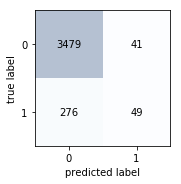

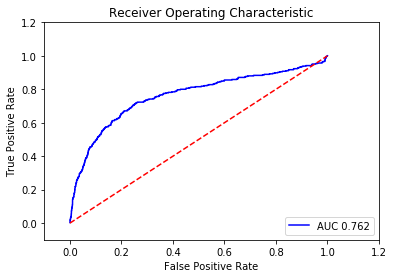

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 512)               3159040   
_________________________________________________________________
dropout_38 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_76 (Dense)             (None, 2)                 1026      
Total params: 3,160,066
Trainable params: 3,160,066
Non-trainable params: 0
_________________________________________________________________
             precision    recall  f1-score   support

          0       0.81      0.91      0.86      2126
          1       0.87      0.74      0.80      1719

avg / total       0.84      0.83      0.83      3845



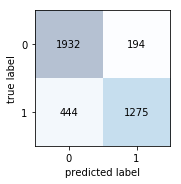

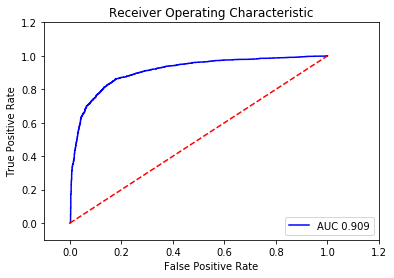

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 512)               3159040   
_________________________________________________________________
dropout_39 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 2)                 1026      
Total params: 3,160,066
Trainable params: 3,160,066
Non-trainable params: 0
_________________________________________________________________
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      3753
          1       0.51      0.32      0.39        92

avg / total       0.97      0.98      0.97      3845



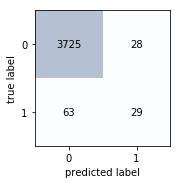

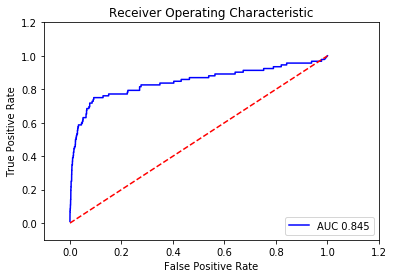

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 512)               3159040   
_________________________________________________________________
dropout_40 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 2)                 1026      
Total params: 3,160,066
Trainable params: 3,160,066
Non-trainable params: 0
_________________________________________________________________
             precision    recall  f1-score   support

          0       0.78      0.85      0.81      2222
          1       0.76      0.66      0.71      1623

avg / total       0.77      0.77      0.77      3845



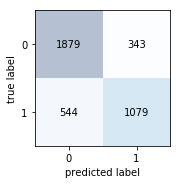

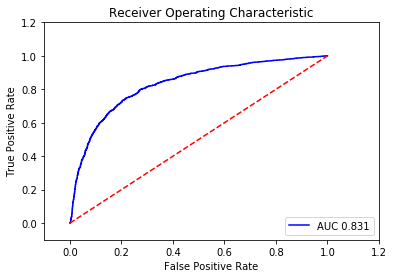

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 512)               3159040   
_________________________________________________________________
dropout_41 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_82 (Dense)             (None, 2)                 1026      
Total params: 3,160,066
Trainable params: 3,160,066
Non-trainable params: 0
_________________________________________________________________
             precision    recall  f1-score   support

          0       0.94      0.99      0.96      3568
          1       0.62      0.14      0.22       277

avg / total       0.91      0.93      0.91      3845



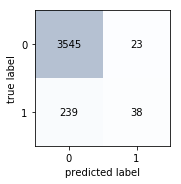

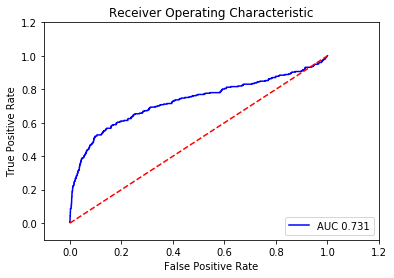

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 512)               3159040   
_________________________________________________________________
dropout_42 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 2)                 1026      
Total params: 3,160,066
Trainable params: 3,160,066
Non-trainable params: 0
_________________________________________________________________
             precision    recall  f1-score   support

      False       0.88      1.00      0.94      3259
       True       0.92      0.26      0.41       586

avg / total       0.89      0.88      0.86      3845



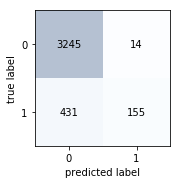

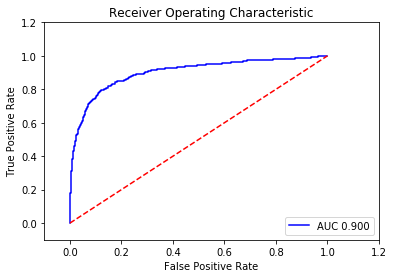

In [10]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, classification_report,confusion_matrix
from sklearn.utils import class_weight
import numpy as np
import matplotlib.pyplot as plt

for i, j in enumerate(TARGET_COLS):
    target_x=pickle.load(open("../pickle/target_x6_mlnew.pkl", "rb" ))
    target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    temp=y_valid[j]
    cw = class_weight.compute_class_weight('balanced', np.unique(y_train[j]), y_train[j])
    y_train = keras.utils.to_categorical(y_train[j], 2)
    #print()
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(int(X_train.shape[1]),)))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    history = model.fit(X_train.values,y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=0,
                    validation_data=(X_valid.values, keras.utils.to_categorical(y_valid[j], 2)),class_weight=cw)
    #score = model.evaluate(x_test, y_test, verbose=0)
    bb = model.predict(X_valid.values)[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cc = model.predict_classes(X_valid.values)
    #print(cc,y_valid[j])
    cfm=(classification_report(temp,cc))
    print(cfm)
    cfm=confusion_matrix(temp,cc)
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()

    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

## hstack((train_bigrams,train_unigrams)).tocsr()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 512)               176128    
_________________________________________________________________
dropout_43 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_86 (Dense)             (None, 2)                 1026      
Total params: 177,154
Trainable params: 177,154
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 1s 120us/step - loss: 0.4188 - acc: 0.8146 - val_loss: 0.3519 - val_acc: 0.8515
Epoch 2/10
12304/12304 [==============================] - 0s 31us/step - loss: 0.3339 - acc: 0.8558 - val_loss: 0.3451 - val_acc: 0.8551
Epoch 3/10
12304/12304 [==============================] - 0s 31us/step - los

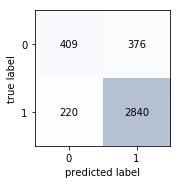

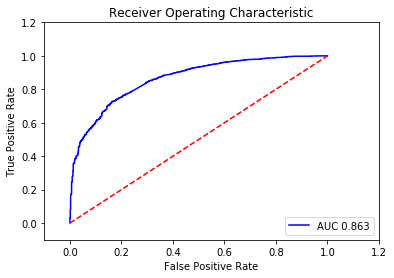

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 512)               176128    
_________________________________________________________________
dropout_44 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_88 (Dense)             (None, 2)                 1026      
Total params: 177,154
Trainable params: 177,154
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 2s 123us/step - loss: 0.2758 - acc: 0.9138 - val_loss: 0.2385 - val_acc: 0.9105
Epoch 2/10
12304/12304 [==============================] - 0s 31us/step - loss: 0.2164 - acc: 0.9187 - val_loss: 0.2335 - val_acc: 0.9176
Epoch 3/10
12304/12304 [==============================] - 0s 31us/step - los

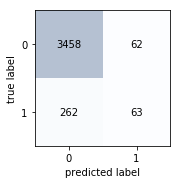

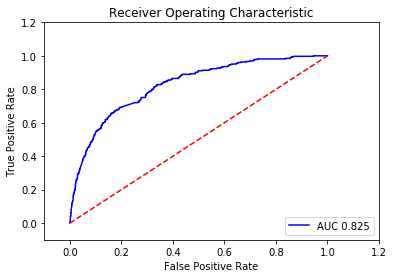

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 512)               176128    
_________________________________________________________________
dropout_45 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 2)                 1026      
Total params: 177,154
Trainable params: 177,154
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 2s 130us/step - loss: 0.5123 - acc: 0.7751 - val_loss: 0.4408 - val_acc: 0.8070
Epoch 2/10
12304/12304 [==============================] - 0s 35us/step - loss: 0.4059 - acc: 0.8262 - val_loss: 0.4280 - val_acc: 0.8172
Epoch 3/10
12304/12304 [==============================] - 0s 34us/step - los

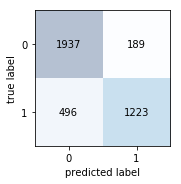

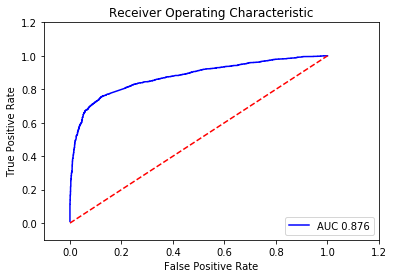

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 512)               176128    
_________________________________________________________________
dropout_46 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 2)                 1026      
Total params: 177,154
Trainable params: 177,154
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 2s 124us/step - loss: 0.1578 - acc: 0.9728 - val_loss: 0.1076 - val_acc: 0.9763
Epoch 2/10
12304/12304 [==============================] - 0s 31us/step - loss: 0.0981 - acc: 0.9754 - val_loss: 0.1041 - val_acc: 0.9766
Epoch 3/10
12304/12304 [==============================] - 0s 31us/step - los

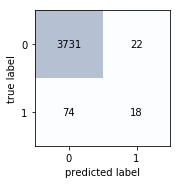

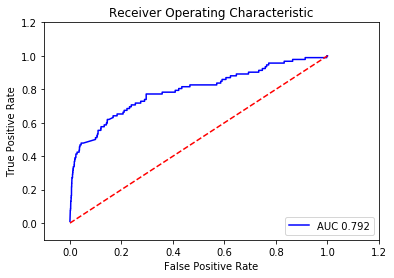

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 512)               176128    
_________________________________________________________________
dropout_47 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_94 (Dense)             (None, 2)                 1026      
Total params: 177,154
Trainable params: 177,154
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 2s 124us/step - loss: 0.5693 - acc: 0.7107 - val_loss: 0.5293 - val_acc: 0.7532
Epoch 2/10
12304/12304 [==============================] - 0s 31us/step - loss: 0.5070 - acc: 0.7538 - val_loss: 0.5243 - val_acc: 0.7547
Epoch 3/10
12304/12304 [==============================] - 0s 31us/step - los

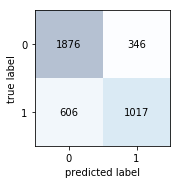

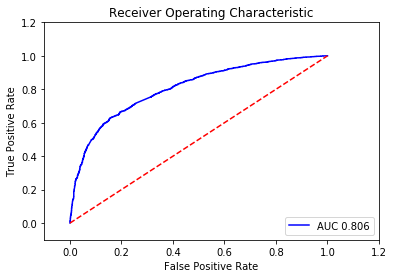

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_95 (Dense)             (None, 512)               176128    
_________________________________________________________________
dropout_48 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_96 (Dense)             (None, 2)                 1026      
Total params: 177,154
Trainable params: 177,154
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 2s 127us/step - loss: 0.2822 - acc: 0.9195 - val_loss: 0.2437 - val_acc: 0.9280
Epoch 2/10
12304/12304 [==============================] - 0s 31us/step - loss: 0.2349 - acc: 0.9265 - val_loss: 0.2363 - val_acc: 0.9293
Epoch 3/10
12304/12304 [==============================] - 0s 31us/step - los

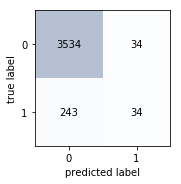

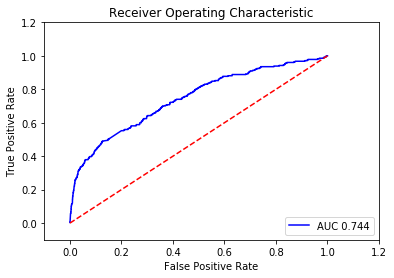

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_97 (Dense)             (None, 512)               176128    
_________________________________________________________________
dropout_49 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_98 (Dense)             (None, 2)                 1026      
Total params: 177,154
Trainable params: 177,154
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 2s 132us/step - loss: 0.3440 - acc: 0.8584 - val_loss: 0.2656 - val_acc: 0.8892
Epoch 2/10
12304/12304 [==============================] - 0s 32us/step - loss: 0.2395 - acc: 0.8974 - val_loss: 0.2477 - val_acc: 0.8941
Epoch 3/10
12304/12304 [==============================] - 0s 31us/step - los

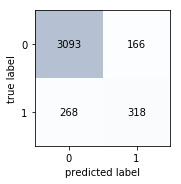

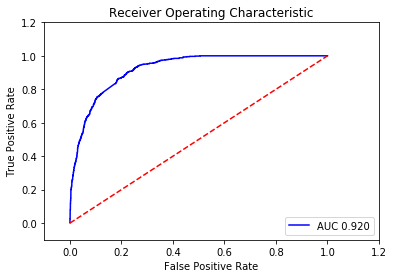

In [11]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, classification_report,confusion_matrix
from sklearn.utils import class_weight
import numpy as np
import matplotlib.pyplot as plt

for i, j in enumerate(TARGET_COLS):
    target_x=pickle.load(open("../pickle/target_x7_mlnew.pkl", "rb" ))
    target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    temp=y_valid[j]
    cw = class_weight.compute_class_weight('balanced', np.unique(y_train[j]), y_train[j])
    y_train = keras.utils.to_categorical(y_train[j], 2)
    #print()
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(int(X_train.shape[1]),)))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    history = model.fit(X_train.values,y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_valid.values, keras.utils.to_categorical(y_valid[j], 2)),class_weight=cw)
    #score = model.evaluate(x_test, y_test, verbose=0)
    bb = model.predict(X_valid.values)[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cc = model.predict_classes(X_valid.values)
    #print(cc,y_valid[j])
    cfm=(classification_report(temp,cc))
    print(cfm)
    cfm=confusion_matrix(temp,cc)
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()

    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

## hstack((train_unigrams, train_charngrams)).tocsr()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 512)               3112448   
_________________________________________________________________
dropout_50 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_100 (Dense)            (None, 2)                 1026      
Total params: 3,113,474
Trainable params: 3,113,474
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 5s 405us/step - loss: 0.3453 - acc: 0.8527 - val_loss: 0.3018 - val_acc: 0.8759
Epoch 2/10
12304/12304 [==============================] - 4s 301us/step - loss: 0.2433 - acc: 0.9077 - val_loss: 0.3062 - val_acc: 0.8746
Epoch 3/10
12304/12304 [==============================] - 4s 304us/step

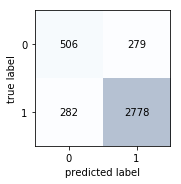

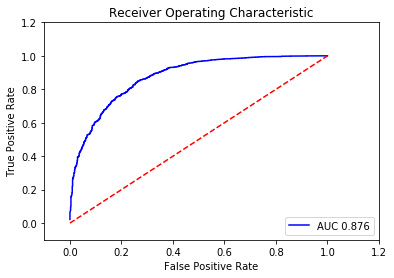

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 512)               3112448   
_________________________________________________________________
dropout_51 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_102 (Dense)            (None, 2)                 1026      
Total params: 3,113,474
Trainable params: 3,113,474
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 5s 406us/step - loss: 0.2474 - acc: 0.9173 - val_loss: 0.2292 - val_acc: 0.9155
Epoch 2/10
12304/12304 [==============================] - 4s 300us/step - loss: 0.1950 - acc: 0.9278 - val_loss: 0.2232 - val_acc: 0.9147
Epoch 3/10
12304/12304 [==============================] - 4s 300us/step

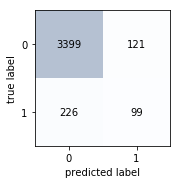

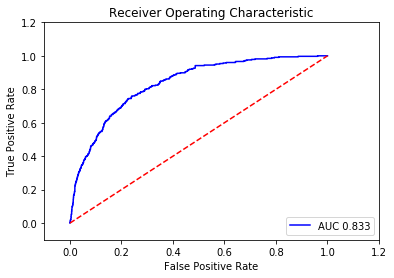

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 512)               3112448   
_________________________________________________________________
dropout_52 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_104 (Dense)            (None, 2)                 1026      
Total params: 3,113,474
Trainable params: 3,113,474
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 5s 406us/step - loss: 0.4348 - acc: 0.8143 - val_loss: 0.3748 - val_acc: 0.8424
Epoch 2/10
12304/12304 [==============================] - 4s 300us/step - loss: 0.3021 - acc: 0.8758 - val_loss: 0.3823 - val_acc: 0.8440
Epoch 3/10
12304/12304 [==============================] - 4s 301us/step

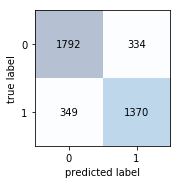

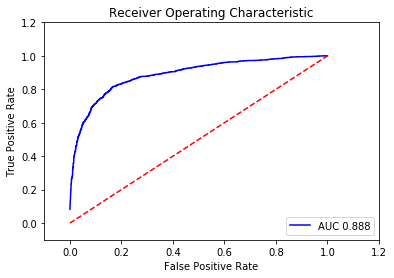

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 512)               3112448   
_________________________________________________________________
dropout_53 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_106 (Dense)            (None, 2)                 1026      
Total params: 3,113,474
Trainable params: 3,113,474
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 5s 403us/step - loss: 0.1316 - acc: 0.9684 - val_loss: 0.1068 - val_acc: 0.9769
Epoch 2/10
12304/12304 [==============================] - 6s 521us/step - loss: 0.0885 - acc: 0.9766 - val_loss: 0.1016 - val_acc: 0.9779
Epoch 3/10
12304/12304 [==============================] - 13s 1ms/step 

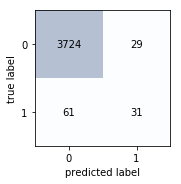

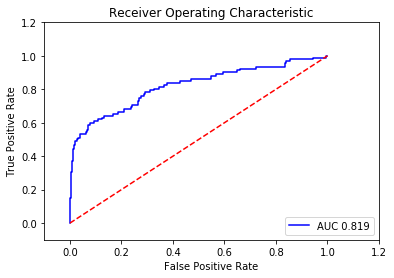

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_107 (Dense)            (None, 512)               3112448   
_________________________________________________________________
dropout_54 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_108 (Dense)            (None, 2)                 1026      
Total params: 3,113,474
Trainable params: 3,113,474
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 14s 1ms/step - loss: 0.5182 - acc: 0.7490 - val_loss: 0.4819 - val_acc: 0.7753
Epoch 2/10
12304/12304 [==============================] - 13s 1ms/step - loss: 0.4120 - acc: 0.8103 - val_loss: 0.4860 - val_acc: 0.7789
Epoch 3/10
12304/12304 [==============================] - 1417s 115ms/ste

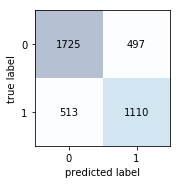

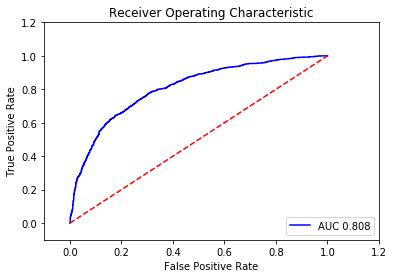

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 512)               3112448   
_________________________________________________________________
dropout_55 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_110 (Dense)            (None, 2)                 1026      
Total params: 3,113,474
Trainable params: 3,113,474
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 5s 433us/step - loss: 0.2542 - acc: 0.9219 - val_loss: 0.2195 - val_acc: 0.9293
Epoch 2/10
12304/12304 [==============================] - 4s 322us/step - loss: 0.1860 - acc: 0.9345 - val_loss: 0.2018 - val_acc: 0.9342
Epoch 3/10
12304/12304 [==============================] - 5s 371us/step

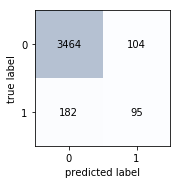

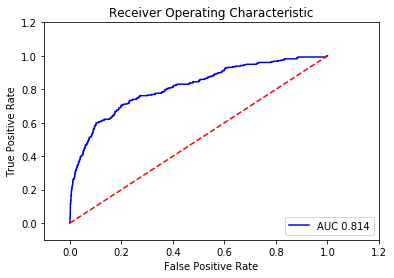

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 512)               3112448   
_________________________________________________________________
dropout_56 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_112 (Dense)            (None, 2)                 1026      
Total params: 3,113,474
Trainable params: 3,113,474
Non-trainable params: 0
_________________________________________________________________
Train on 12304 samples, validate on 3845 samples
Epoch 1/10
12304/12304 [==============================] - 5s 433us/step - loss: 0.2557 - acc: 0.8969 - val_loss: 0.1901 - val_acc: 0.9267
Epoch 2/10
12304/12304 [==============================] - 4s 301us/step - loss: 0.1357 - acc: 0.9476 - val_loss: 0.1845 - val_acc: 0.9269
Epoch 3/10
12304/12304 [==============================] - 4s 302us/step

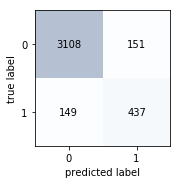

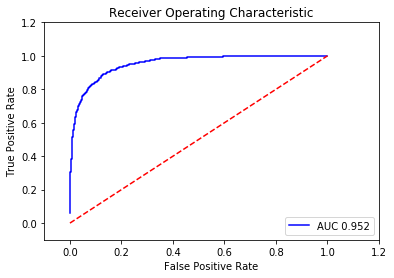

In [12]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, classification_report,confusion_matrix
from sklearn.utils import class_weight
import numpy as np
import matplotlib.pyplot as plt

for i, j in enumerate(TARGET_COLS):
    target_x=pickle.load(open("../pickle/target_x8_mlnew.pkl", "rb" ))
    target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    temp=y_valid[j]
    cw = class_weight.compute_class_weight('balanced', np.unique(y_train[j]), y_train[j])
    y_train = keras.utils.to_categorical(y_train[j], 2)
    #print()
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(int(X_train.shape[1]),)))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    history = model.fit(X_train.values,y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_valid.values, keras.utils.to_categorical(y_valid[j], 2)),class_weight=cw)
    #score = model.evaluate(x_test, y_test, verbose=0)
    bb = model.predict(X_valid.values)[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cc = model.predict_classes(X_valid.values)
    #print(cc,y_valid[j])
    cfm=(classification_report(temp,cc))
    print(cfm)
    cfm=confusion_matrix(temp,cc)
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()

    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

## hstack((train_unigrams, train_charngrams,train_bigrams)).tocsr()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_113 (Dense)            (None, 512)               3112448   
_________________________________________________________________
dropout_57 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_114 (Dense)            (None, 2)                 1026      
Total params: 3,113,474
Trainable params: 3,113,474
Non-trainable params: 0
_________________________________________________________________
             precision    recall  f1-score   support

          0       0.67      0.61      0.64       785
          1       0.90      0.92      0.91      3060

avg / total       0.86      0.86      0.86      3845



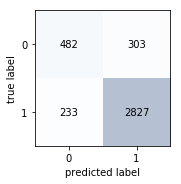

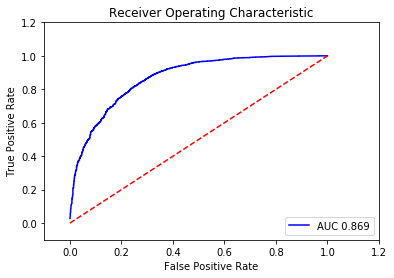

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_115 (Dense)            (None, 512)               3112448   
_________________________________________________________________
dropout_58 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_116 (Dense)            (None, 2)                 1026      
Total params: 3,113,474
Trainable params: 3,113,474
Non-trainable params: 0
_________________________________________________________________
             precision    recall  f1-score   support

          0       0.94      0.97      0.95      3520
          1       0.46      0.31      0.37       325

avg / total       0.90      0.91      0.90      3845



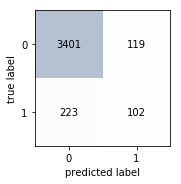

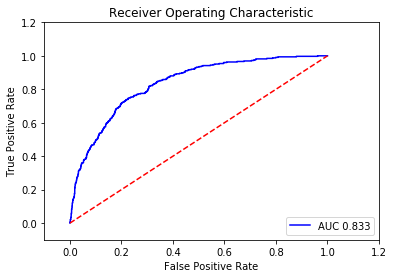

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_117 (Dense)            (None, 512)               3112448   
_________________________________________________________________
dropout_59 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_118 (Dense)            (None, 2)                 1026      
Total params: 3,113,474
Trainable params: 3,113,474
Non-trainable params: 0
_________________________________________________________________
             precision    recall  f1-score   support

          0       0.84      0.84      0.84      2126
          1       0.80      0.80      0.80      1719

avg / total       0.82      0.82      0.82      3845



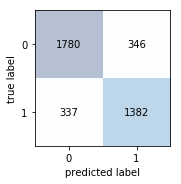

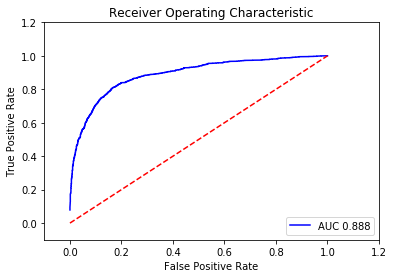

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_119 (Dense)            (None, 512)               3112448   
_________________________________________________________________
dropout_60 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_120 (Dense)            (None, 2)                 1026      
Total params: 3,113,474
Trainable params: 3,113,474
Non-trainable params: 0
_________________________________________________________________
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      3753
          1       0.51      0.33      0.40        92

avg / total       0.97      0.98      0.97      3845



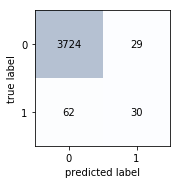

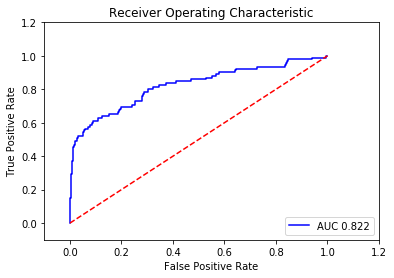

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 512)               3112448   
_________________________________________________________________
dropout_61 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_122 (Dense)            (None, 2)                 1026      
Total params: 3,113,474
Trainable params: 3,113,474
Non-trainable params: 0
_________________________________________________________________
             precision    recall  f1-score   support

          0       0.78      0.75      0.76      2222
          1       0.68      0.71      0.69      1623

avg / total       0.74      0.73      0.73      3845



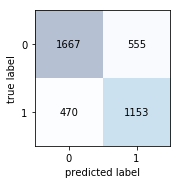

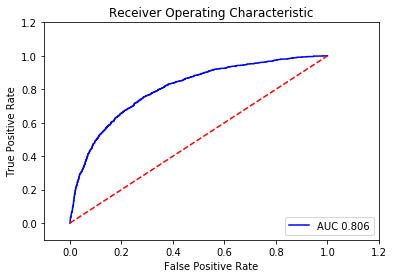

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_123 (Dense)            (None, 512)               3112448   
_________________________________________________________________
dropout_62 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_124 (Dense)            (None, 2)                 1026      
Total params: 3,113,474
Trainable params: 3,113,474
Non-trainable params: 0
_________________________________________________________________
             precision    recall  f1-score   support

          0       0.95      0.96      0.96      3568
          1       0.45      0.38      0.41       277

avg / total       0.92      0.92      0.92      3845



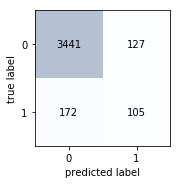

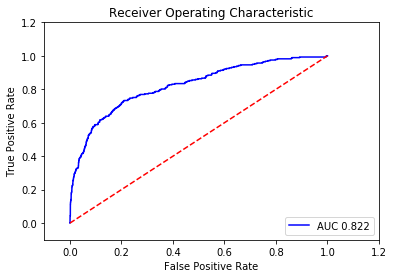

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_125 (Dense)            (None, 512)               3112448   
_________________________________________________________________
dropout_63 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_126 (Dense)            (None, 2)                 1026      
Total params: 3,113,474
Trainable params: 3,113,474
Non-trainable params: 0
_________________________________________________________________
             precision    recall  f1-score   support

      False       0.96      0.95      0.95      3259
       True       0.72      0.75      0.74       586

avg / total       0.92      0.92      0.92      3845



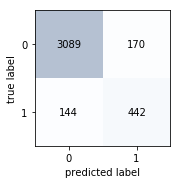

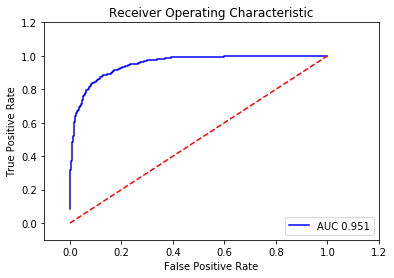

In [13]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, classification_report,confusion_matrix
from sklearn.utils import class_weight
import numpy as np
import matplotlib.pyplot as plt

for i, j in enumerate(TARGET_COLS):
    target_x=pickle.load(open("../pickle/target_x9_mlnew.pkl", "rb" ))
    target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    temp=y_valid[j]
    cw = class_weight.compute_class_weight('balanced', np.unique(y_train[j]), y_train[j])
    y_train = keras.utils.to_categorical(y_train[j], 2)
    #print()
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(int(X_train.shape[1]),)))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    history = model.fit(X_train.values,y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=0,
                    validation_data=(X_valid.values, keras.utils.to_categorical(y_valid[j], 2)),class_weight=cw)
    #score = model.evaluate(x_test, y_test, verbose=0)
    bb = model.predict(X_valid.values)[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cc = model.predict_classes(X_valid.values)
    #print(cc,y_valid[j])
    cfm=(classification_report(temp,cc))
    print(cfm)
    cfm=confusion_matrix(temp,cc)
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()

    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()